In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
data=pd.read_csv("/content/drive/MyDrive/fraud_dataset_example.csv")

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
 10  isFlaggedFraud  101613 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [45]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,101613.000000,101613.0
mean,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06,0.001142,0.0
std,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06,0.033768,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04,0.000000,0.0
75%,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07,1.000000,0.0


In [46]:
data.shape

(101613, 11)

In [47]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [48]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
101608,10,PAYMENT,7477.02,C513257306,785.00,0.0,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.0,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.0,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.0,C1631408038,541639.43,2186953.43,0,0
101612,10,CASH_OUT,469539.21,C515691325,31133.00,0.0,C1383702768,0.00,469539.21,0,0


<Axes: xlabel='type', ylabel='count'>

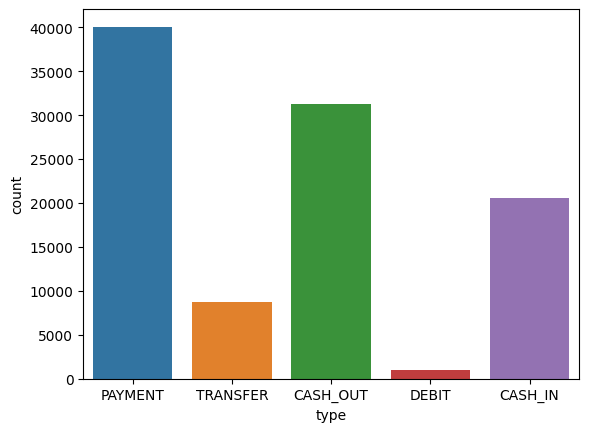

In [50]:
sns.countplot(x='type', data=data)

<Axes: xlabel='isFraud', ylabel='count'>

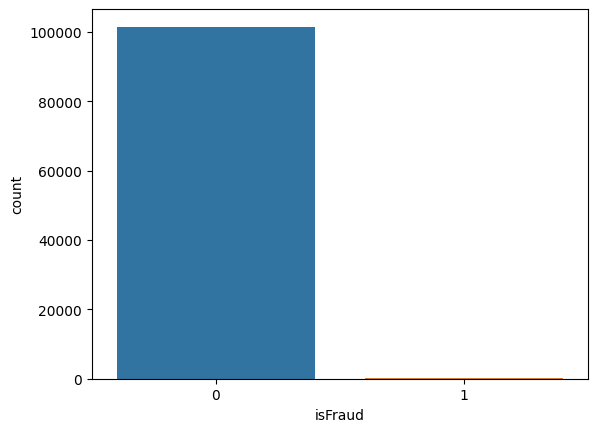

In [51]:
sns.countplot(x='isFraud', data=data)

In [52]:
data['isFraud'].value_counts()

0    101497
1       116
Name: isFraud, dtype: int64

In [53]:
# Downsampling to balance the dataset
is_notfraud = data[data.isFraud == 0]
is_fraud= data[data.isFraud == 1]
is_notfraud = is_notfraud.sample(n=len(is_fraud),
						random_state=42)

balanced_data = is_notfraud.append(is_fraud)\
    .reset_index(drop=True)

<ipython-input-53-1829bbcde974>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = is_notfraud.append(is_fraud)\


<Axes: xlabel='isFraud', ylabel='count'>

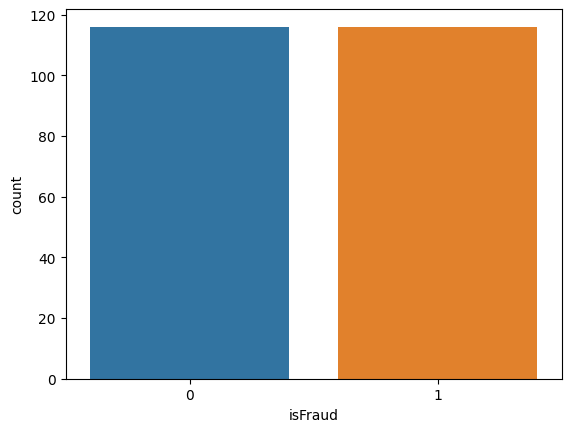

In [54]:
sns.countplot(data = balanced_data, x='isFraud')

In [55]:
balanced_data['isFraud'].value_counts()

0    116
1    116
Name: isFraud, dtype: int64

In [56]:
balanced_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,10,PAYMENT,9577.78,C247116574,130790.50,121212.73,M906498006,0.00,0.00,0,0
1,10,CASH_OUT,96770.08,C289615305,0.00,0.00,C676400325,160717.91,297456.78,0,0
2,10,TRANSFER,653754.66,C1266926121,0.00,0.00,C738124829,1418944.95,2758177.72,0,0
3,9,CASH_OUT,282409.98,C993066513,0.00,0.00,C201210119,392630.35,482745.48,0,0
4,9,CASH_IN,129065.26,C880438686,4794363.91,4923429.17,C405881980,2788678.14,4889687.47,0,0


In [57]:
balanced_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
227,10,CASH_OUT,277970.88,C489647033,0.00,0.0,C571514738,0.00,277970.88,1,0
228,10,TRANSFER,93810.76,C481501970,93810.76,0.0,C1262577882,0.00,0.00,1,0
229,10,CASH_OUT,93810.76,C1190429229,93810.76,0.0,C2104652067,4096048.05,4189858.81,1,0
230,10,TRANSFER,503405.88,C1446009472,503405.88,0.0,C2010733400,0.00,0.00,1,0
231,10,CASH_OUT,503405.88,C140359285,503405.88,0.0,C2020337583,29669.00,533074.88,1,0


sns.countplot(x='type', data=balanced_data)

<Axes: xlabel='type', ylabel='amount'>

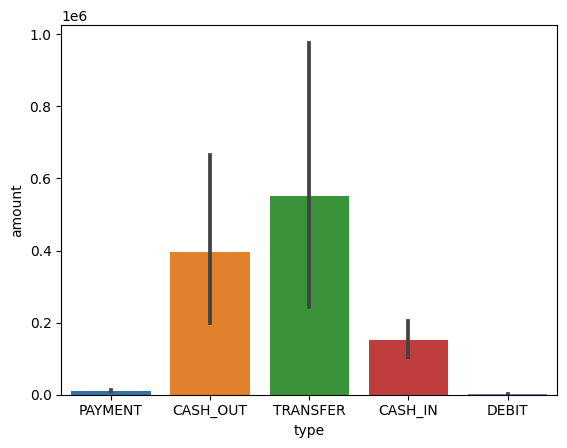

In [58]:
sns.barplot(x='type', y='amount', data=balanced_data)

<ipython-input-59-7d7dcdbdda68>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(balanced_data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

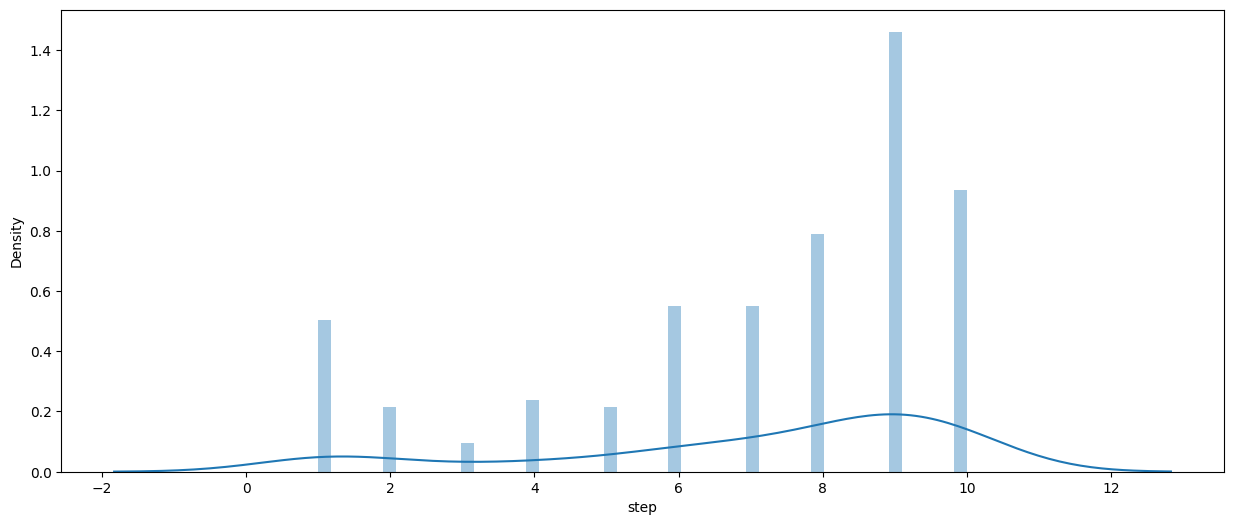

In [59]:
plt.figure(figsize=(15, 6))
sns.distplot(balanced_data['step'], bins=50)

In [60]:
#converting categorical value to the numerical
balanced_data["type"] = balanced_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
print(balanced_data.head())

   step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0    10     2    9577.78   C247116574      130790.50       121212.73   
1    10     1   96770.08   C289615305           0.00            0.00   
2    10     4  653754.66  C1266926121           0.00            0.00   
3     9     1  282409.98   C993066513           0.00            0.00   
4     9     3  129065.26   C880438686     4794363.91      4923429.17   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M906498006            0.00            0.00        0               0  
1  C676400325       160717.91       297456.78        0               0  
2  C738124829      1418944.95      2758177.72        0               0  
3  C201210119       392630.35       482745.48        0               0  
4  C405881980      2788678.14      4889687.47        0               0  


In [61]:
balanced_data.type.value_counts()

1    94
4    62
2    47
3    26
5     3
Name: type, dtype: int64

In [62]:
balanced_data.type.unique()

array([2, 1, 4, 3, 5])

In [63]:
CrosstabResult=pd.crosstab(index=balanced_data.type,columns=balanced_data.isFraud)
CrosstabResult

isFraud,0,1
type,,
1,35,59
2,47,0
3,26,0
4,5,57
5,3,0


In [64]:
total_fraud= balanced_data[balanced_data.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud


116

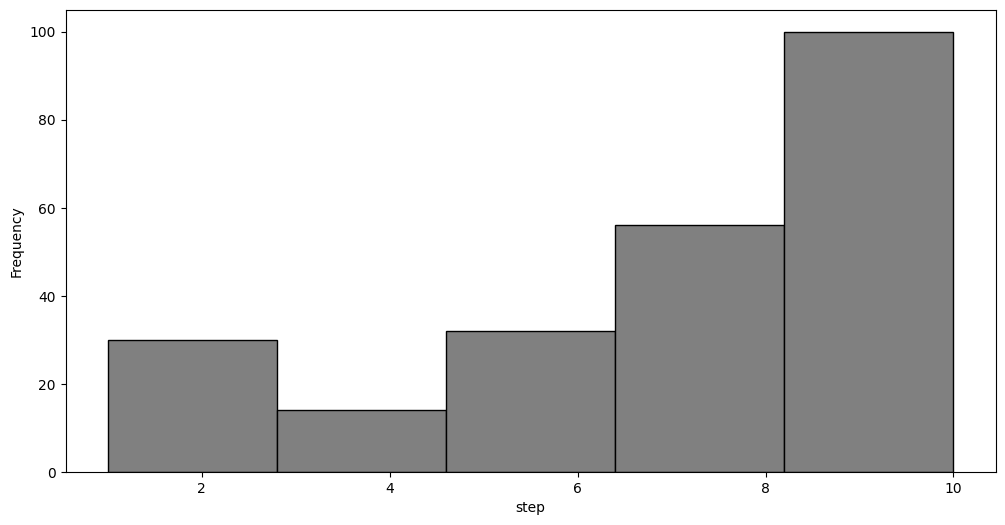

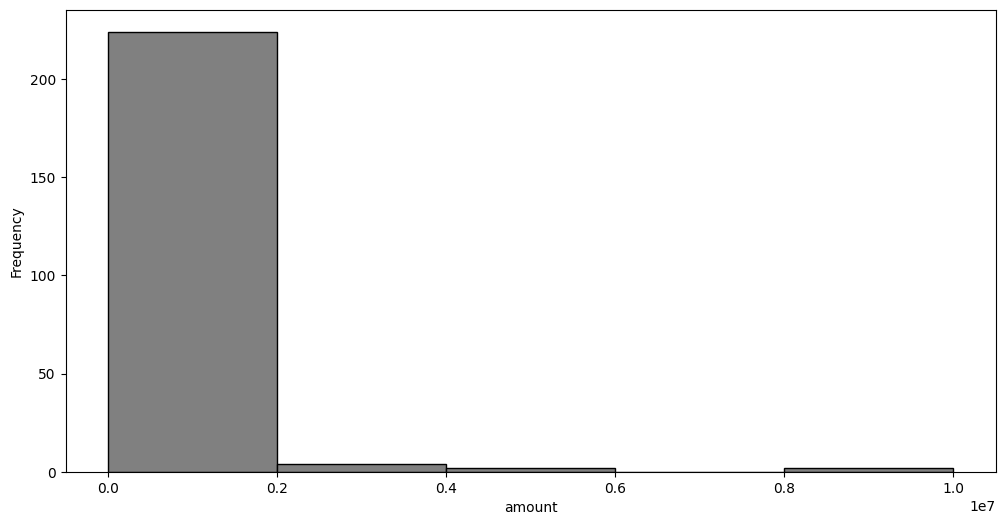

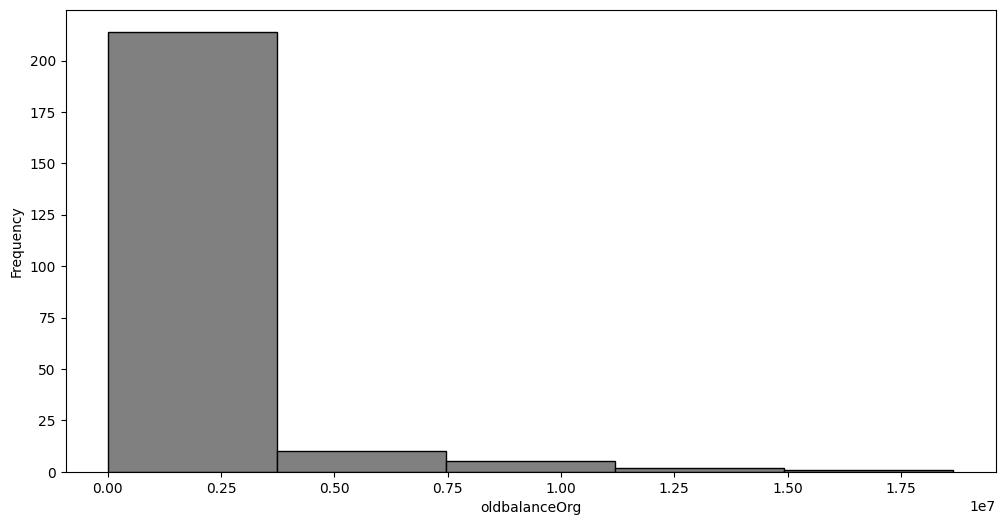

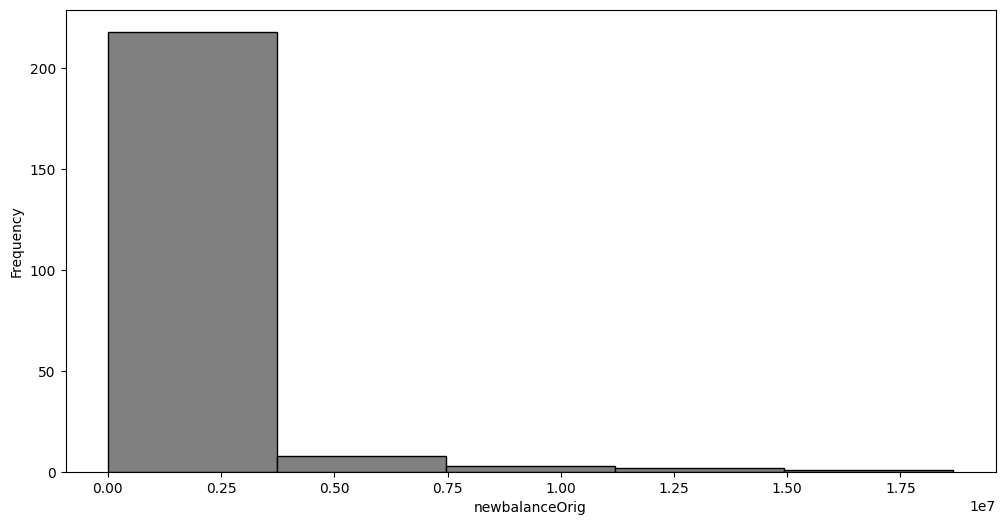

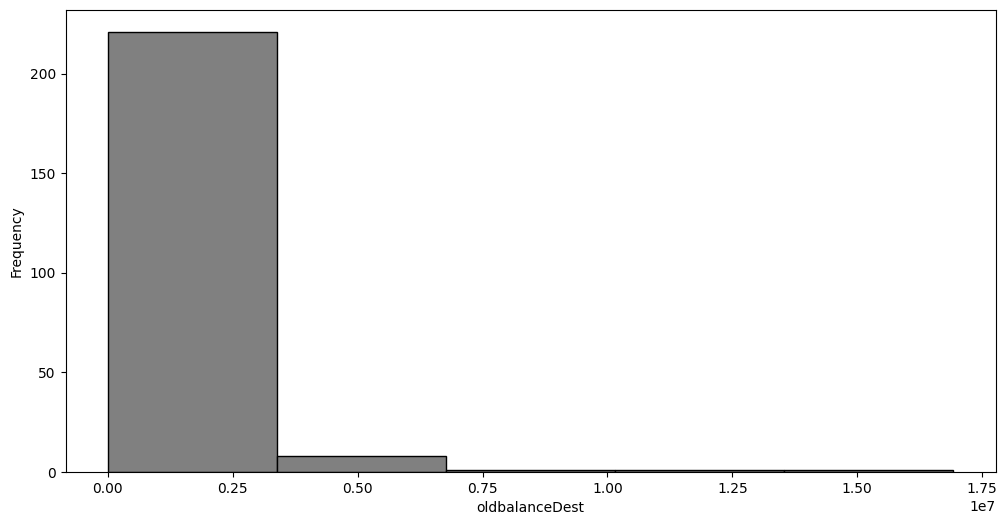

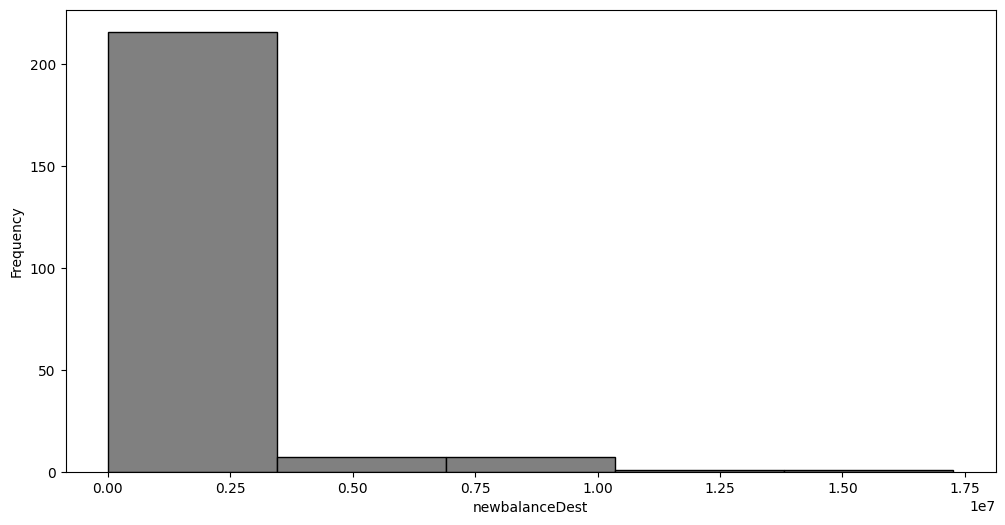

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    balanced_data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

In [66]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = balanced_data[i].quantile(0.10)
    upper = balanced_data[i].quantile(0.90)
    balanced_data[i] = np.where(balanced_data[i] <lower, lower,balanced_data[i])
    balanced_data[i] = np.where(balanced_data[i] >upper, upper,balanced_data[i])
    print('Feature: ',i)
    print('Skewness value: ',balanced_data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  1.3750221935258873


Feature:  oldbalanceOrg
Skewness value:  1.9709896055647236


Feature:  newbalanceOrig
Skewness value:  2.211777562842715


Feature:  oldbalanceDest
Skewness value:  1.7405468027067992


Feature:  newbalanceDest
Skewness value:  1.6883707765380853




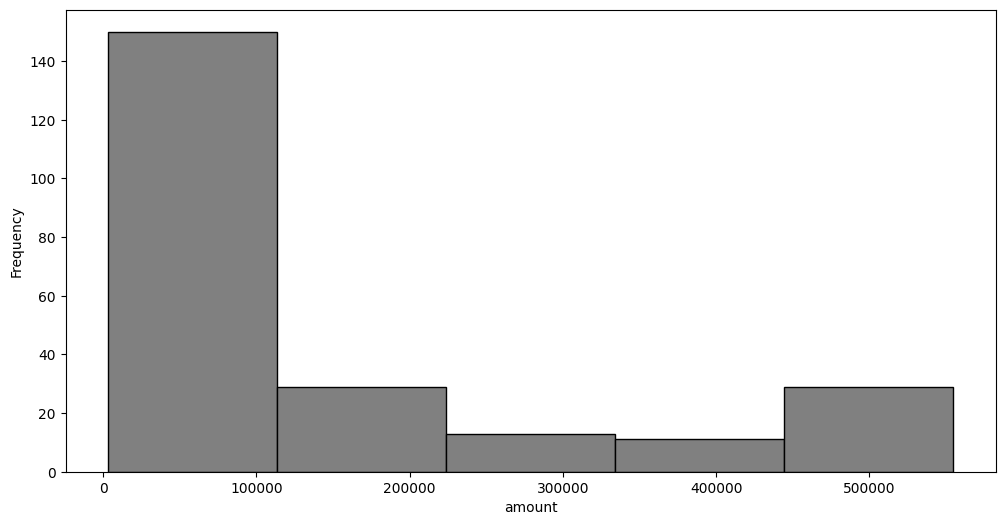

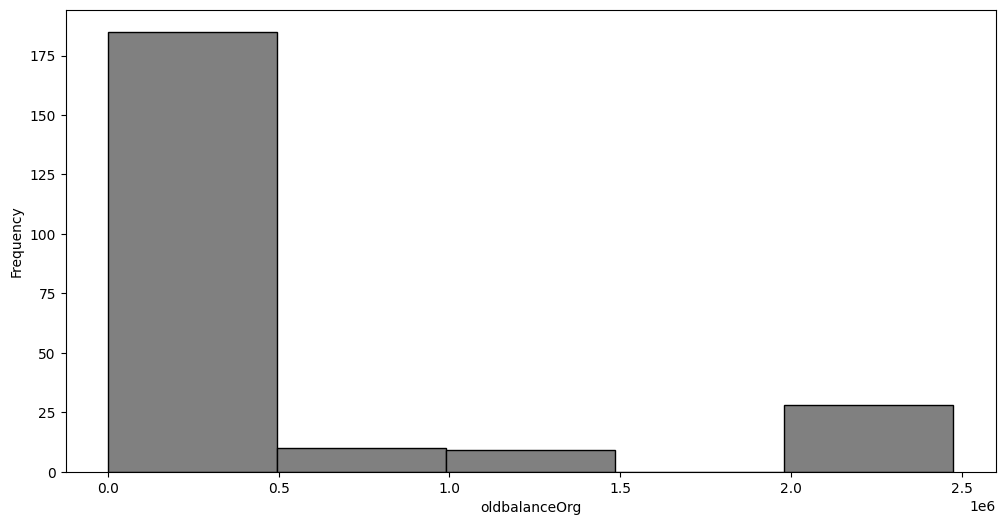

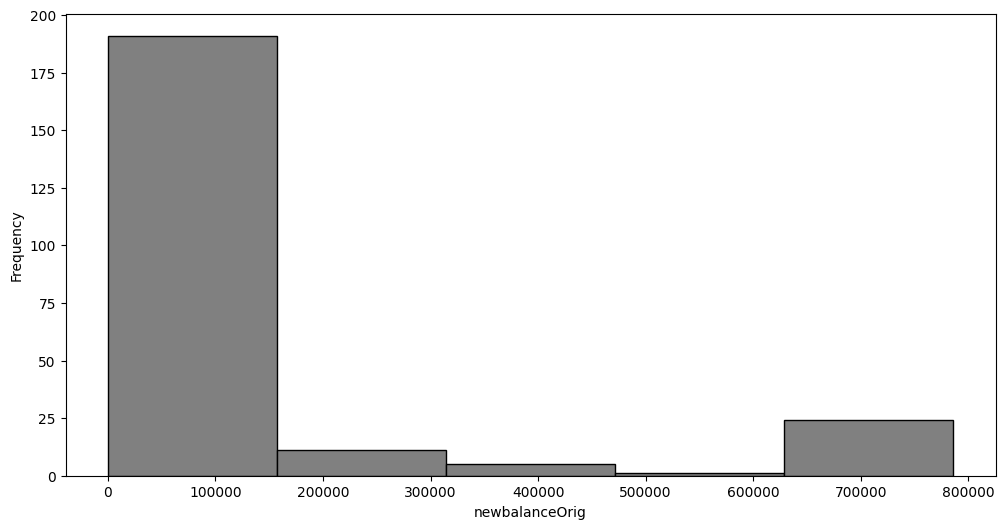

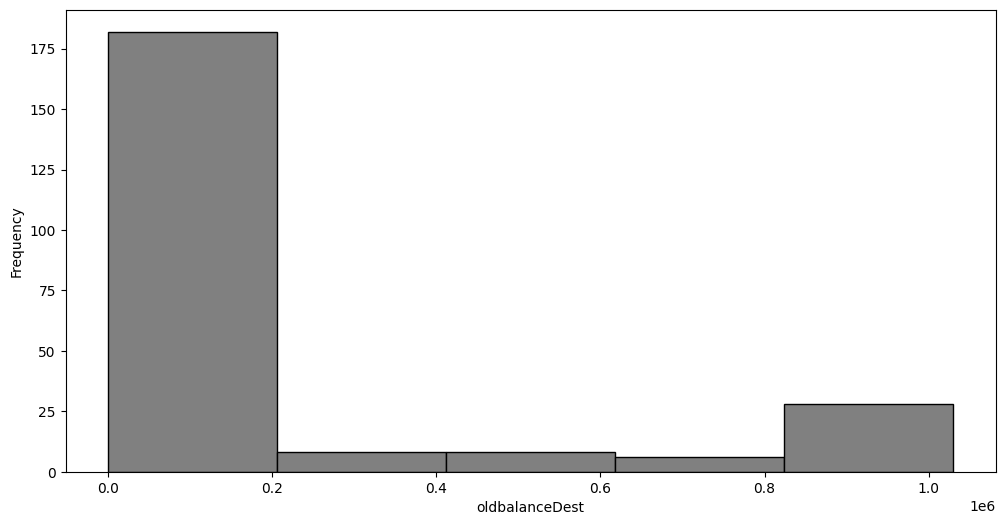

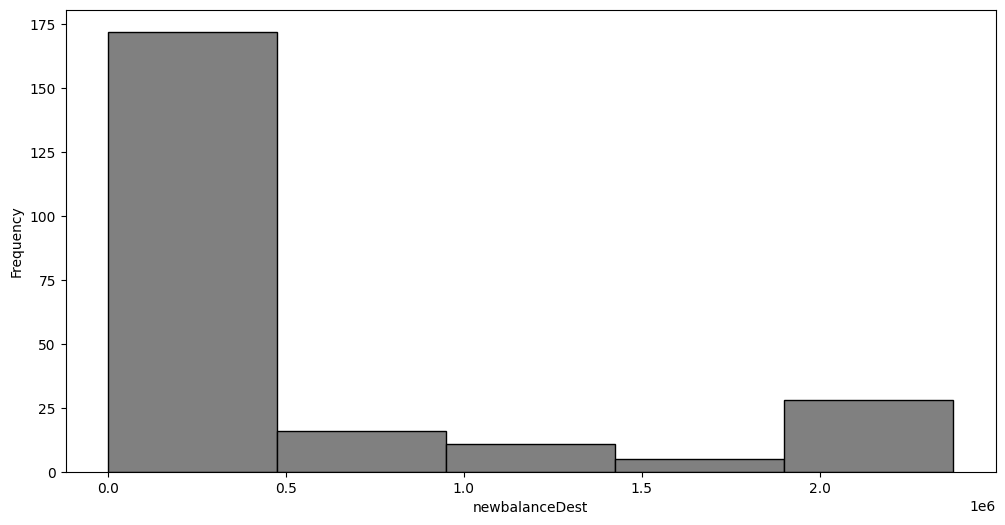

In [67]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    balanced_data[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.show()

<ipython-input-68-f4aaa8eeb1f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = balanced_data.corr()# plot the heatmap


<Axes: >

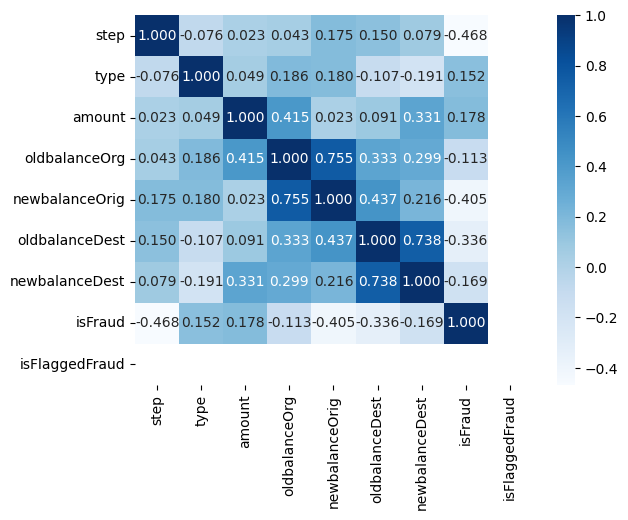

In [68]:
corr = balanced_data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [69]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [70]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [71]:
X.shape, y.shape

((101613, 11), (101613,))

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)

In [73]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [74]:
models = [LogisticRegression(), XGBClassifier(),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() : 
Training Accuracy :  0.9181395761908113
Validation Accuracy :  0.9609836792328911

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.9995915703402076

RandomForestClassifier(criterion='entropy', n_estimators=7, rand

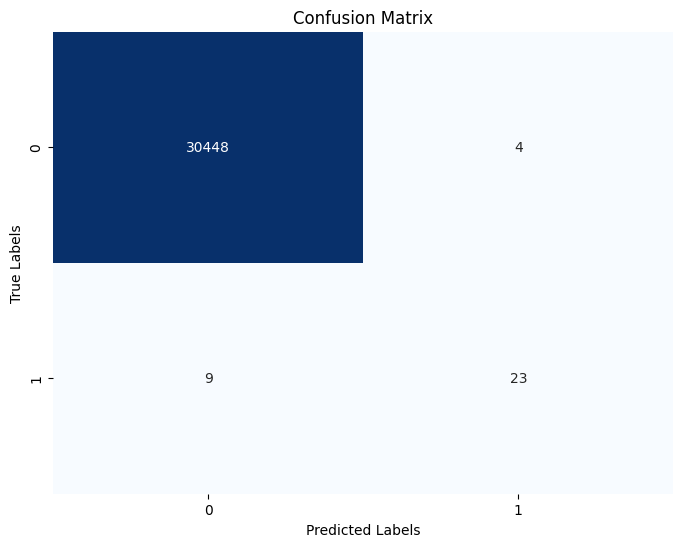

In [75]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score
y_pred = models[1].predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()